In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

# Task 1: Load real-world dataset (Breast Cancer Wisconsin dataset)
# Question: How does real-world data differ from synthetic data?
#They differe becasue areal-world data contains missing values 
#while synthetic data is controlled testing but may not capture the complexity of the real-world data
data = load_breast_cancer()
X = data.data[:, :2]  # Use the first two features for visualization purposes
y = data.target

# Standardize features to improve convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Task 2: Write a function to train and evaluate logistic regression models with polynomial features
# Question: What does polynomial transformation do to our feature set?
#Polynomial transformation has the feature set by creating new features that are combinations of the original ones
def evaluate_model(degree, C=1.0, max_iter=10000):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Task 2.1: Implement Logistic Regression Model with regularization
    # Question: How does logistic regression differ from linear regression?
    #Linear is used for predicting continuous numerical values and Logistic is for classifications, and predicting probabilites
    # Explanation: Logistic regression is used for classification, applying the sigmoid function to outputs
    # to map them to probabilities, whereas linear regression predicts continuous values.
    
    # Explanation: C is the inverse of regularization strength. A smaller C applies stronger regularization,
    # which can prevent overfitting but may lead to underfitting. A larger C reduces regularization,
    # allowing the model to fit the data more closely but increasing the risk of overfitting.
    model = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=max_iter)
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_test_prob = model.predict_proba(X_test_poly)[:, 1]  # Probabilities for ROC-AUC
    
    # Task 2.2: Calculate evaluation metrics
    # Question: What does accuracy measure, and when can it be misleading?
    #It means that the proportion of correctly classified instances out of all instances in a dataset.
    #Accuracy measure can be misleading in an imbalanced dataset.
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    
    print(f"Degree {degree}, C={C}:")
    print(f"  Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"  Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"  ROC-AUC: {roc_auc:.2f}\n")
    
    # Task 2.3: Plot decision boundary (only for 2D features)
    if X.shape[1] == 2:
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train data', alpha=0.6)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test data')
        plt.legend()
        plt.title(f'Polynomial Logistic Regression (Degree {degree}, C={C})')
        plt.show()
    
    # Task 2.4: Plot ROC Curve
    # Question: What does the ROC curve show us about model performance?
    #ROC is a graphical representation of a classification model's performance across different classification thresholds
    #so it shows us the perfomance measures of the model across thresholds.
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    plt.plot(fpr, tpr, label=f'Degree {degree}, AUC={roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()






Degree 1, C=1.0:
  Train Accuracy: 0.89, Test Accuracy: 0.90
  Precision: 0.91, Recall: 0.94, F1 Score: 0.92
  ROC-AUC: 0.97



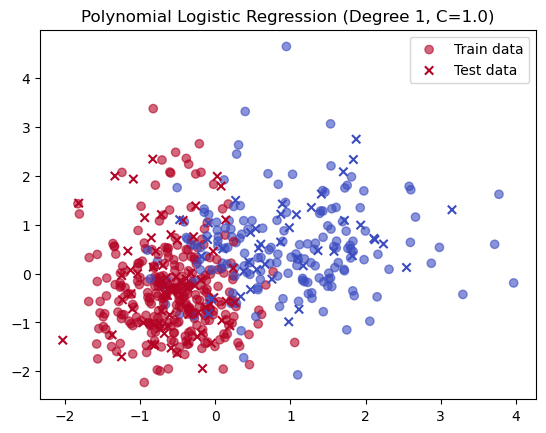

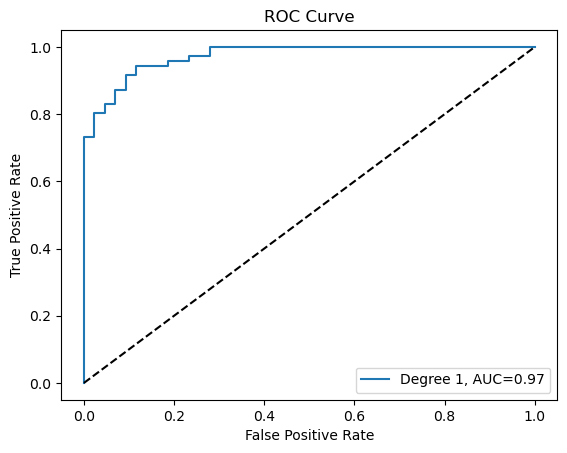

In [15]:
# Task 3: Evaluate models with different degrees
# Question: What do you expect to see for different polynomial degrees?
#The feature set expands or reudces to include nonlinear combinations of the original features
evaluate_model(1, C=1.0) 

Degree 2, C=1.0:
  Train Accuracy: 0.90, Test Accuracy: 0.91
  Precision: 0.92, Recall: 0.94, F1 Score: 0.93
  ROC-AUC: 0.97



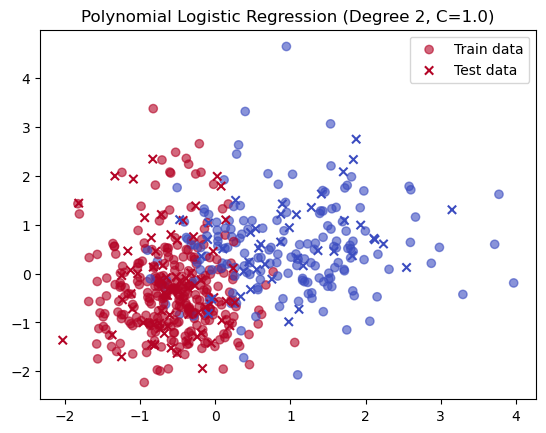

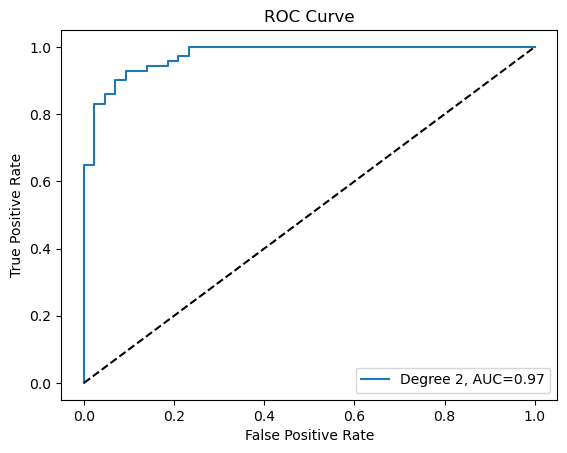

Degree 1, C=0.5:
  Train Accuracy: 0.89, Test Accuracy: 0.90
  Precision: 0.91, Recall: 0.94, F1 Score: 0.92
  ROC-AUC: 0.97



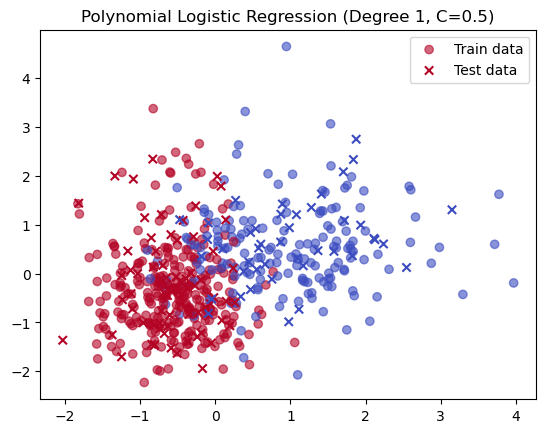

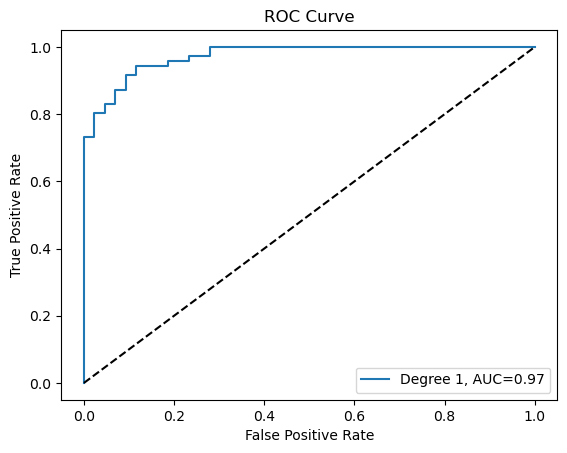

In [18]:
# Task 4: Modify the degree values and analyze the impact
# Question: How do the evaluation metrics change with different degrees and C values?
#the evaluation metrics  change based on the degrees and C value.
evaluate_model(2, C=1.0)  
evaluate_model(1, C=.5) 